# EDA sobre los precios de billetes de avión

## Preparación del notebook

In [66]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [67]:
df=pd.read_csv('data\\Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Introducción al caso

El objetivo del estudio es analizar el conjunto de datos de reservas de vuelos obtenido del sitio web "Ease My Trip"
y realizar diversas pruebas estadísticas de hipótesis para obtener información significativa del mismo.
Easemytrip" es una plataforma de Internet para reservar billetes de avión.
Un estudio exhaustivo de los datos ayudará a descubrir información valiosa que será de enorme valor para los pasajeros.

## Preguntas de investigación

El objetivo de nuestro estudio es responder a las siguientes preguntas de investigación:

    a) ¿Varía el precio con las aerolíneas?

    b) ¿Cómo se ve afectado el precio cuando los billetes se compran sólo 1 ó 2 días antes de la salida?
    
    c) ¿Cambia el precio del billete en función de la hora de salida y de llegada?

    d) ¿Cómo varía el precio con el cambio de origen y destino?
    
    e) ¿Cómo varía el precio del billete entre la clase Turista y la Business?

## Carga de los datos

In [68]:
'''cargamos fcihero desde la carpeta data'''
df=pd.read_csv('data\\Clean_Dataset.csv')

'''guardamos dataframe original por si lo necesitamos más adelante'''
df_original=df

'''mostrasmos 5 primeros registros'''

df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Exploración y preparación de los datos

"'Parece que no hay valores nulos"

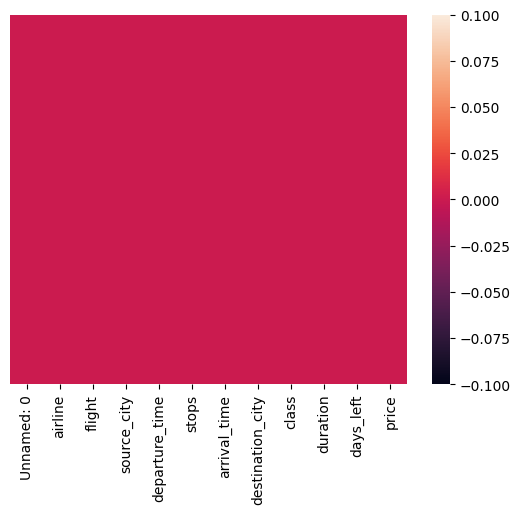

In [69]:
'''Inspeccionamos de forma gráfica el nivel de valores nulos que hay en el dataframe'''

sns.heatmap(df.isna(),yticklabels=False);

''''Parece que no hay valores nulos'''


In [70]:
'''Inspeccionamos los tipos de datos de cada varialble y la cantidad de filas, columnas'''
'''Comprobamos que no hay valores nulos'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [71]:
'''Obtenemos el número de valores únicos de las columnnas con valores categóricos'''

for col in df.select_dtypes(include='object').columns:
    
    print(f"{col:25} ---> {df[col].nunique():15} unique values")

airline                   --->               6 unique values
flight                    --->            1561 unique values
source_city               --->               6 unique values
departure_time            --->               6 unique values
stops                     --->               3 unique values
arrival_time              --->               6 unique values
destination_city          --->               6 unique values
class                     --->               2 unique values


In [72]:
'''kpis básicos de las columnuas no catagoricas'''
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


A continución:

    1- Eliminaremos del dataframe la columna Unnamed, parece ser el índice anterior

    2- El campo duración esta en formato horas.minutos ejemplo= 2.17 son 2 horas y 17 minutos. Es algo extraño que existan duraciones de vuelo de 49 horas con 83 minutos, por lo tanto pondremos en cuarentena los datos de este campo
    
    3- La columna price rejefla el precio en rupias ya que obsevando las aerolinias, origenes y destinos vemos que todo esta ubicado en la India, para hacerlo más familiar a la audiencia transformaremos este campo a € con un cambio de 1€ --> 88 rupias

In [73]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [74]:
def trans_duracion(x):
    
    decimal, entero = math.modf(x)
    new_duration=int(entero*60+decimal*100)
    return new_duration

df['minutes_duration'] =df['duration'].map(trans_duracion)
df['price_euros']= df.apply(lambda row: row.price/88, axis = 1)
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,minutes_duration,price_euros
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,137,67.647727
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,153,67.647727
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,137,67.681818
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,145,67.670455
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,153,67.670455


## Análisis y respuesta a cuestiones

#### ¿Varía el precio con las aerolíneas?

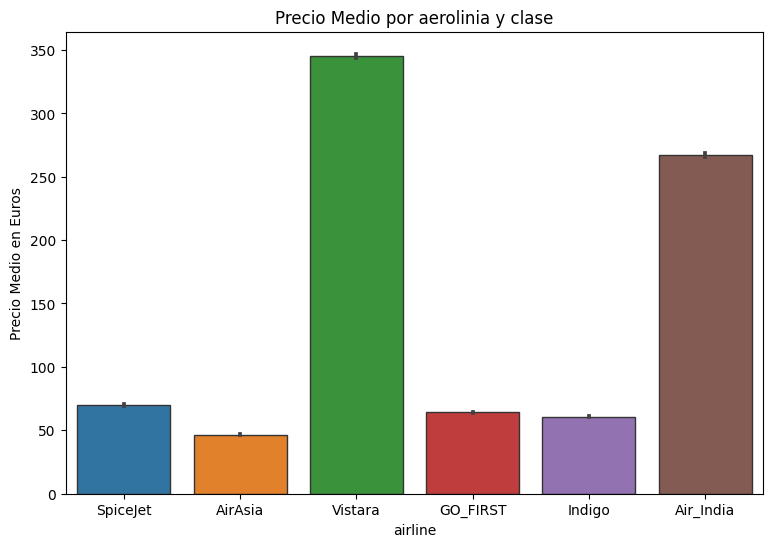

In [132]:
plt.figure(figsize=(9,6))
sns.barplot(x = 'airline',y='price_euros',data = df,edgecolor=".2")
plt.ylabel("Precio Medio en Euros")
plt.title("Precio Medio por aerolinia y clase");

In [100]:
'''Vemos que solo hay dos aerolineas que ofrecen vuelos de clase Business'''
df.groupby(['class','airline'])['flight'].count()

class     airline  
Business  Air_India    32898
          Vistara      60589
Economy   AirAsia      16098
          Air_India    47994
          GO_FIRST     23173
          Indigo       43120
          SpiceJet      9011
          Vistara      67270
Name: flight, dtype: int64

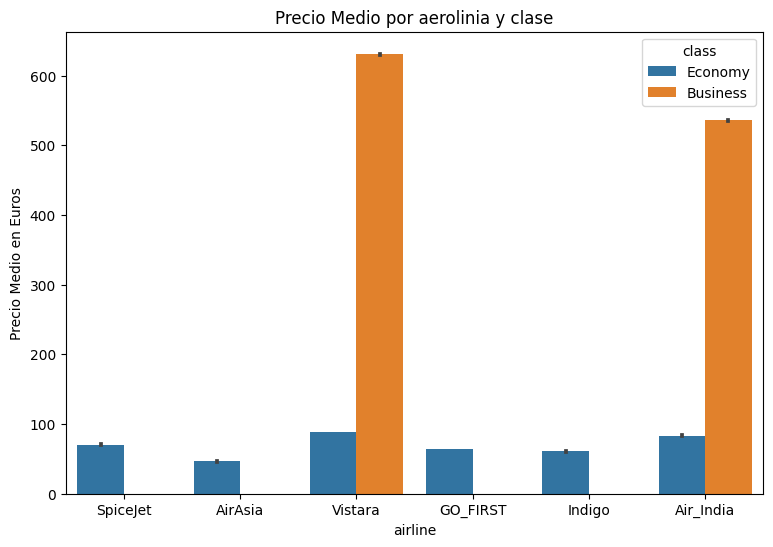

In [133]:
'''Obtenemos el precio por aerolinea'''
plt.figure(figsize=(9,6));
sns.barplot(x='airline',y='price_euros',data=df,hue='class')
plt.ylabel("Precio Medio en Euros")
plt.title("Precio Medio por aerolinia y clase");

Tanto en clase business como en clase turista, la aerolínea Vistara es la que ofrece los billetes de avión más caros.

#### ¿Cómo se ve afectado el precio cuando los billetes se compran sólo 1 ó 2 días antes de la salida?

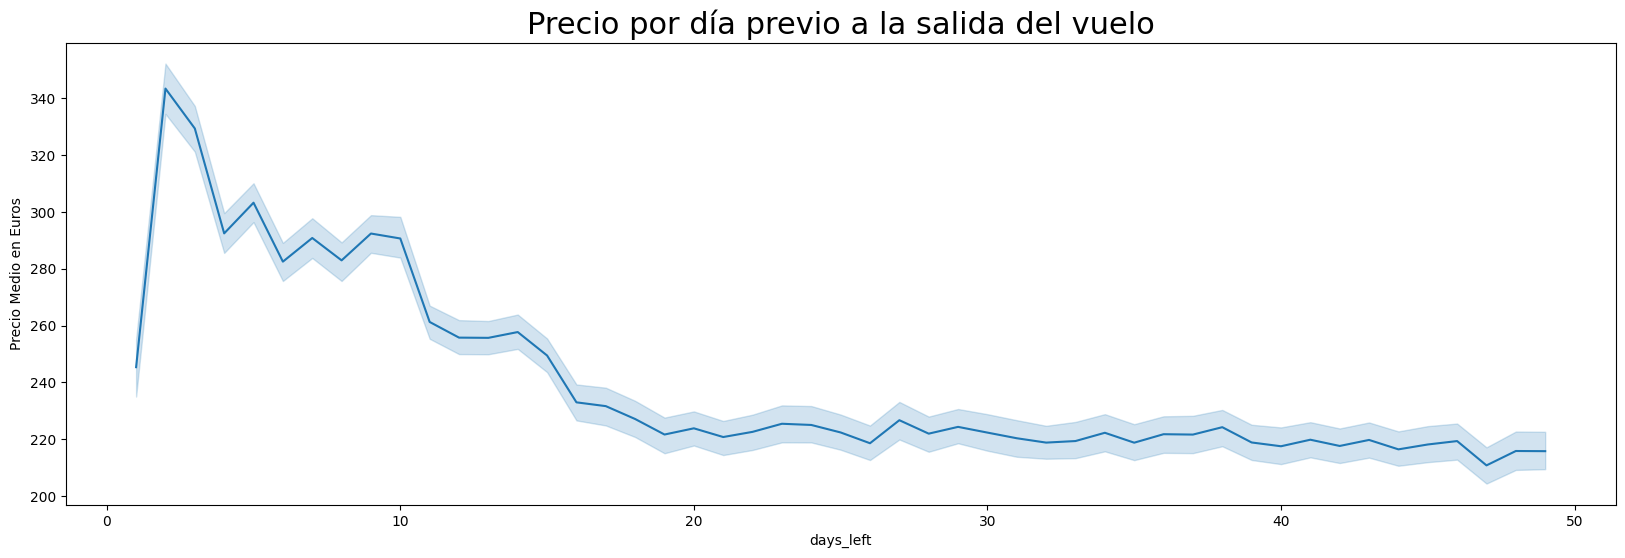

In [149]:
fig,ax=plt.subplots(figsize=(20,6))
sns.lineplot(x='days_left',y='price_euros',data=df)
plt.ylabel("Precio Medio en Euros")
plt.title("Precio por día previo a la salida del vuelo",fontsize=22);

#Cuidado esta gráfica es engañosa

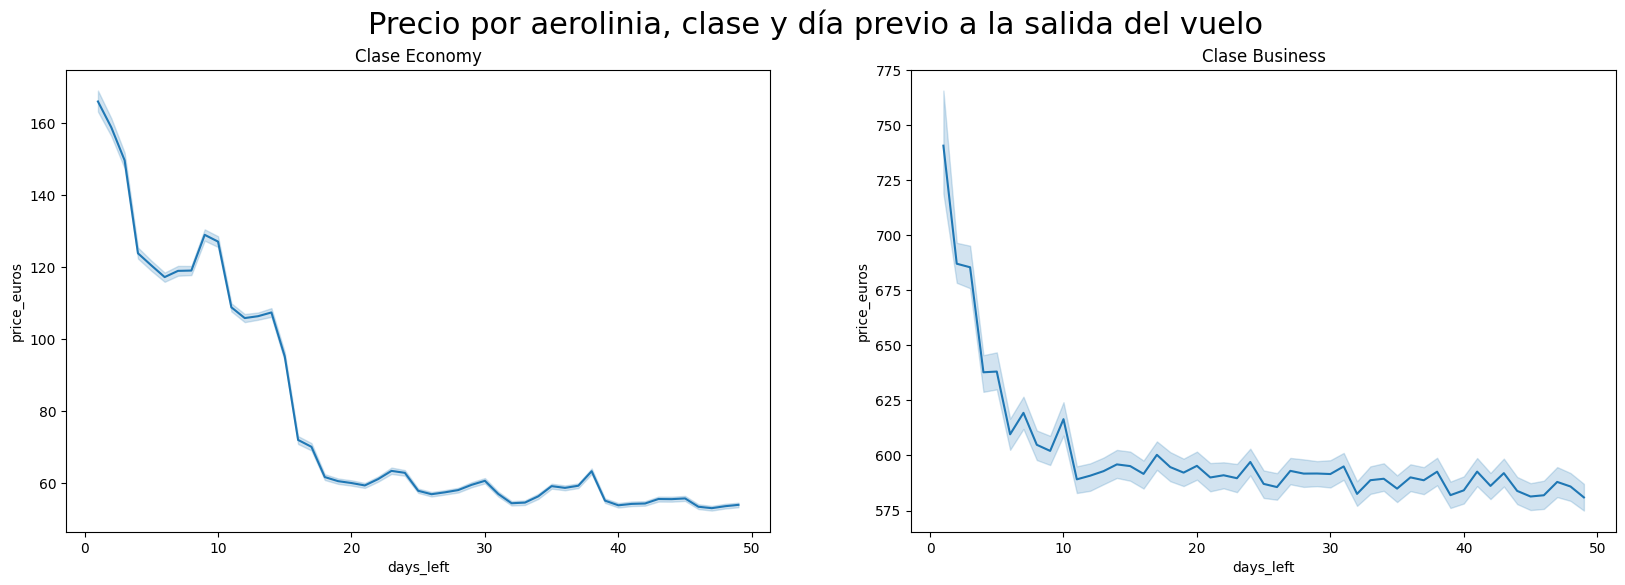

In [178]:

fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='price_euros',data=df[df['class']=='Economy'],ax=ax[0])
g2=sns.lineplot(x='days_left',y='price_euros',data=df[df['class']=='Business'],ax=ax[1])
fig.suptitle("Precio por aerolinia, clase y día previo a la salida del vuelo",fontsize=22)
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business");

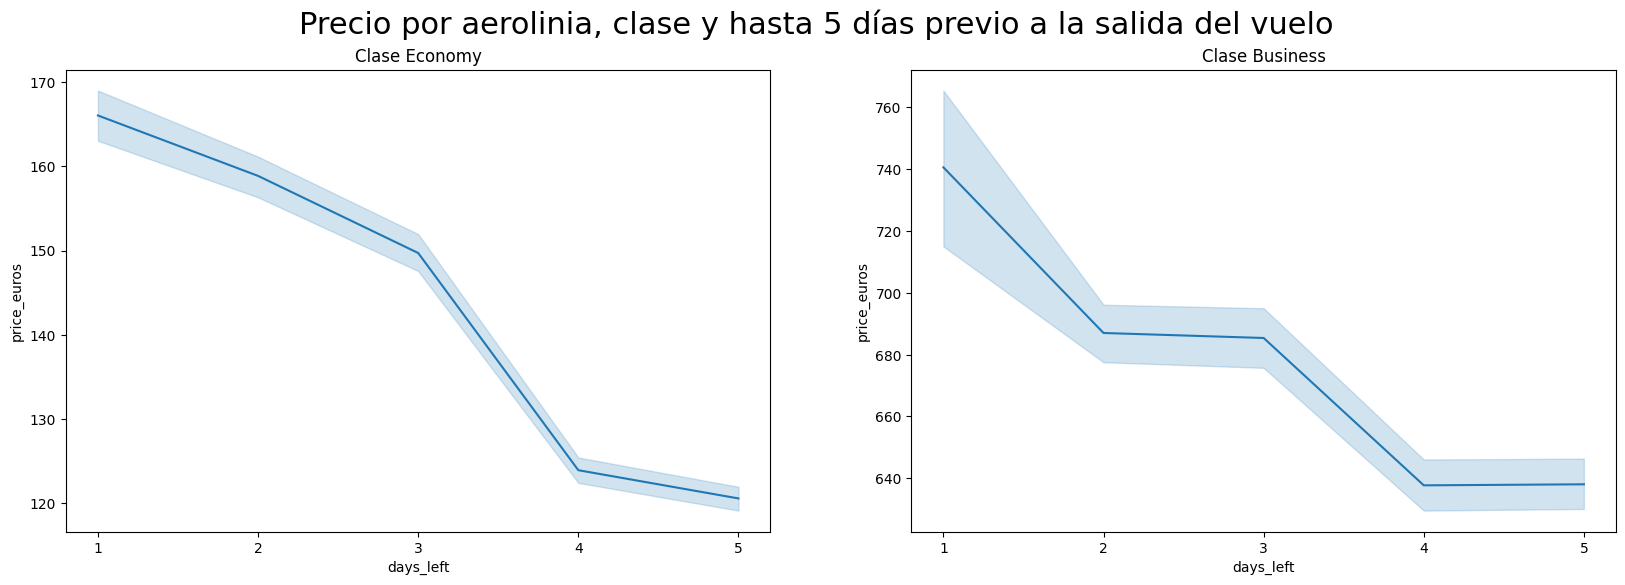

In [185]:

fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='price_euros',data=df[(df['days_left']<6) & (df['class']=='Economy')],ax=ax[0])
g2=sns.lineplot(x='days_left',y='price_euros',data=df[(df['days_left']<6) & (df['class']=='Business')],ax=ax[1])
fig.suptitle("Precio por aerolinia, clase y hasta 5 días previo a la salida del vuelo",fontsize=22)
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business")
ax[0].set(xticks=([1,2,3,4,5]))
ax[1].set(xticks=([1,2,3,4,5]));

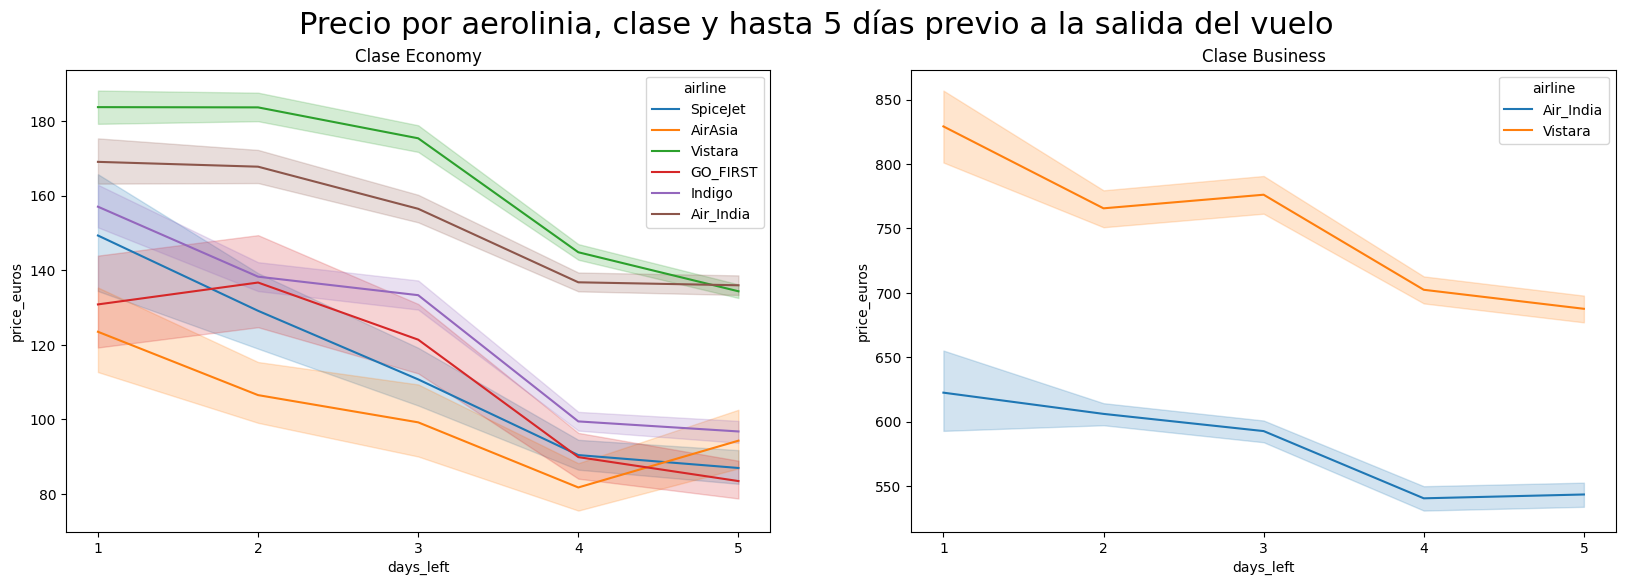

In [186]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='price_euros',data=df[(df['days_left']<6) & (df['class']=='Economy')],hue='airline',ax=ax[0])
g2=sns.lineplot(x='days_left',y='price_euros',data=df[(df['days_left']<6) & (df['class']=='Business')],hue='airline',ax=ax[1])
fig.suptitle("Precio por aerolinia, clase y hasta 5 días previo a la salida del vuelo",fontsize=22)
ax[0].set(title="Clase Economy")
ax[1].set(title="Clase Business")
ax[0].set(xticks=([1,2,3,4,5]))
ax[1].set(xticks=([1,2,3,4,5]));

Como norma general los precio siguen aumentando hasta el último día de venta excepto la aerolinea GO_FIRT que baja lo precios en casi todos sus vuelos, especialmente destino Bangalore.

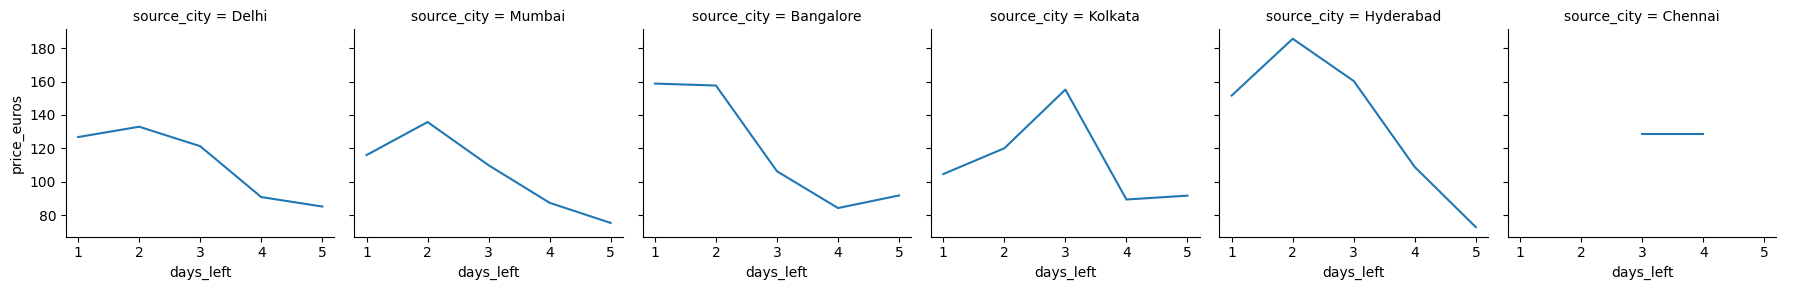

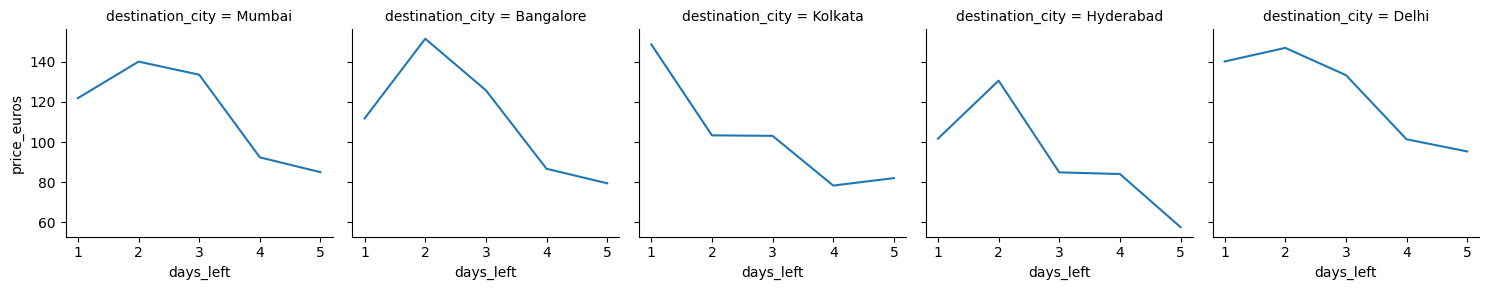

In [195]:
g1 = sns.FacetGrid(data=df[(df['days_left']<6) & (df['class']=='Economy')&(df['airline']=='GO_FIRST')], col='source_city')
g1 = g1.map(sns.lineplot, 'days_left', 'price_euros', errorbar=None).add_legend()
g2 = sns.FacetGrid(data=df[(df['days_left']<6) & (df['class']=='Economy')&(df['airline']=='GO_FIRST')], col='destination_city')
g2 = g2.map(sns.lineplot, 'days_left', 'price_euros', errorbar=None).add_legend();

Tanto en clase business como en clase turista, la aerolínea Vistara es la que ofrece los billetes de avión más caros.

#### ¿Cambia el precio del billete en función de la hora de salida y de llegada?

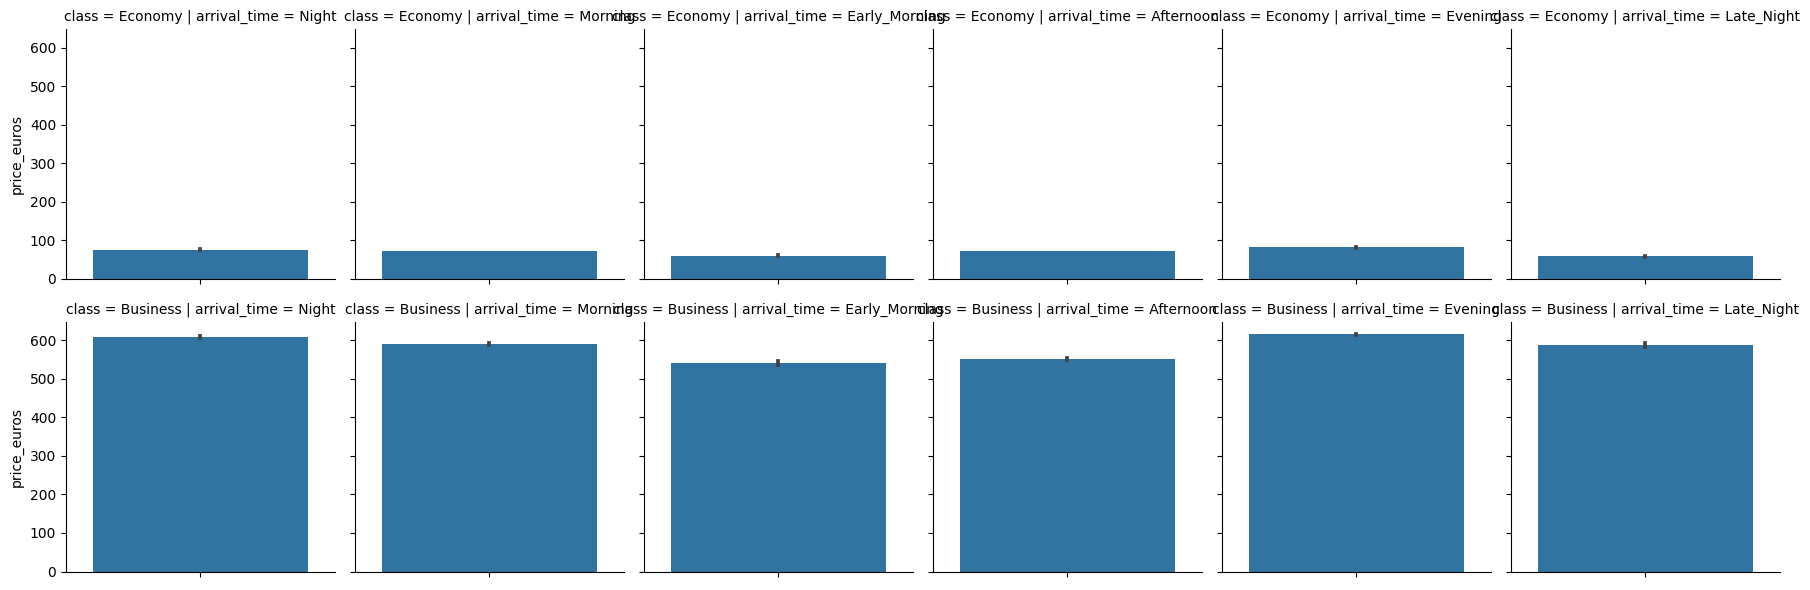

In [211]:
g = sns.FacetGrid(df, row="class",  col="arrival_time")
g.map_dataframe(sns.barplot, y="price_euros")

#### ¿Cómo varía el precio con el cambio de origen y destino?

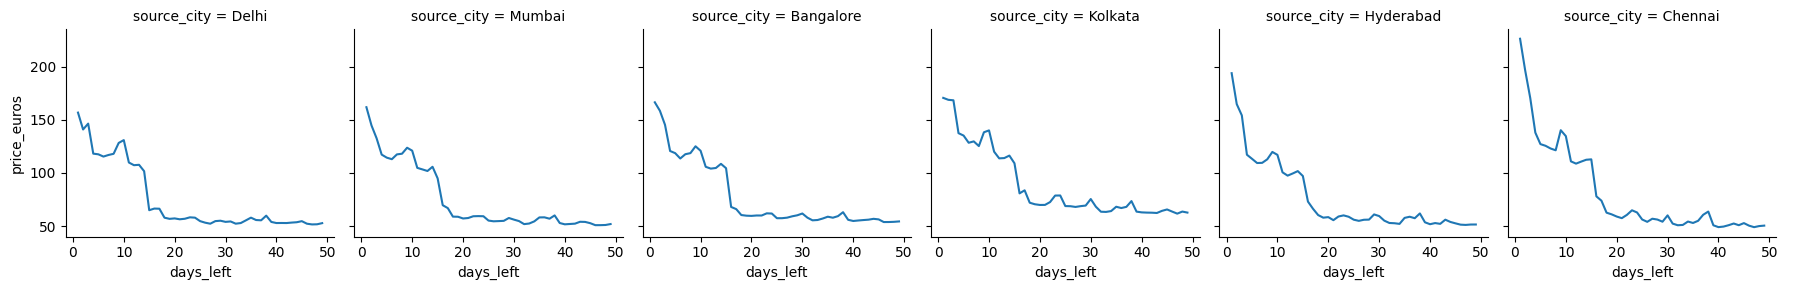

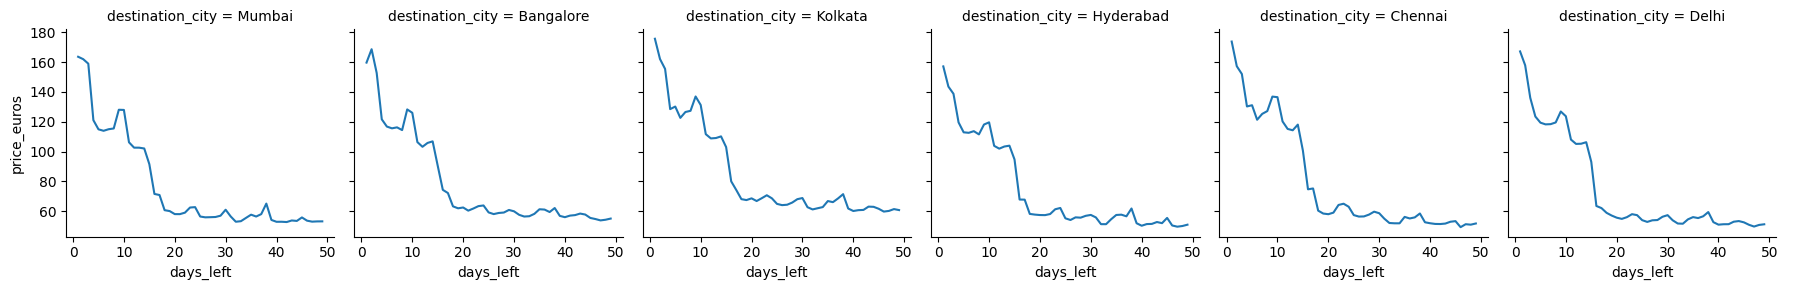

In [213]:
g1 = sns.FacetGrid(data=df[(df['class']=='Economy')], col='source_city')
g1 = g1.map(sns.lineplot, 'days_left', 'price_euros', errorbar=None).add_legend()
g2 = sns.FacetGrid(data=df[(df['class']=='Economy')], col='destination_city')
g2 = g2.map(sns.lineplot, 'days_left', 'price_euros', errorbar=None).add_legend();

#### ¿Cómo varía el precio del billete entre la clase Turista y la Business?

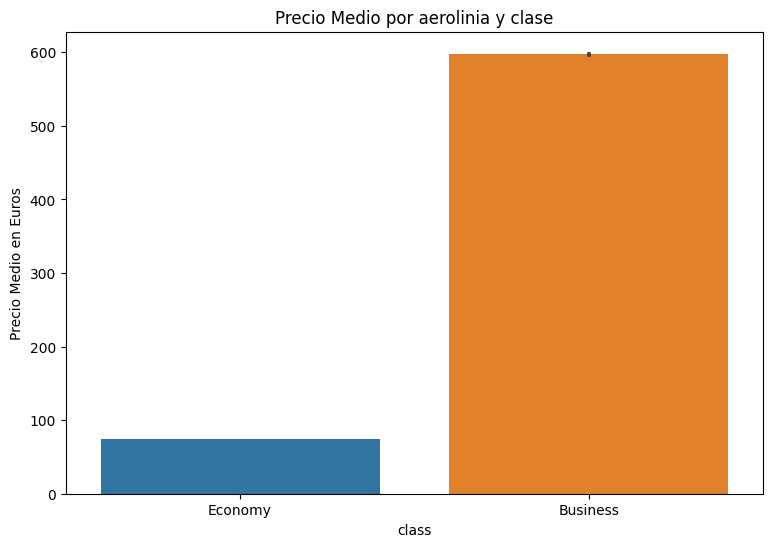

In [214]:
'''Obtenemos el precio por clase'''
plt.figure(figsize=(9,6));
sns.barplot(x='class',y='price_euros',data=df)
plt.ylabel("Precio Medio en Euros")
plt.title("Precio Medio por aerolinia y clase");